## 讀取資料

In [1]:
import pandas
df = pandas.read_csv('https://github.com/ywchiu/tibamedl/raw/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


## 資料前處理

In [0]:
df = df.iloc[:,3:]
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

## 分為訓練與測試資料集

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

## 資料標準化

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## 建立ANN

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
model.add(tf.keras.layers.Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

history = model.fit(x_train, y_train,
                        batch_size=10,
                        epochs=100,
                        verbose=0,
                        validation_data=(x_test, y_test))


In [8]:
predictions = model(x_test).numpy()
predictions

array([[0.690953  ],
       [0.03803959],
       [0.05292246],
       ...,
       [0.01388234],
       [0.00174591],
       [0.01365495]], dtype=float32)

In [0]:
y_pred = (predictions > 0.5)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred )

0.9336363636363636

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred )

In [13]:
cm

array([[931,  19],
       [ 54,  96]])

In [0]:
from sklearn.metrics import roc_curve
fpr_ary, tpr_ary, thresholds = roc_curve(y_test, y_pred)

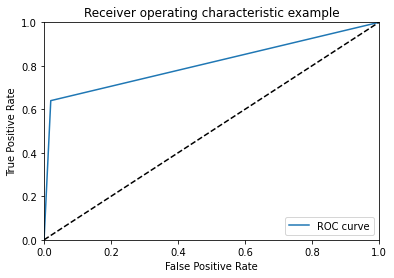

In [15]:
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [17]:
from sklearn.metrics import auc
auc(fpr_ary, tpr_ary)

0.81

## 使用ROC 比較模型

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(x_train, y_train)

clf2 = SVC(probability = True)
clf2.fit(x_train, y_train)

clf3 = LogisticRegression()
clf3.fit(x_train, y_train)

clf4 = RandomForestClassifier()
clf4.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

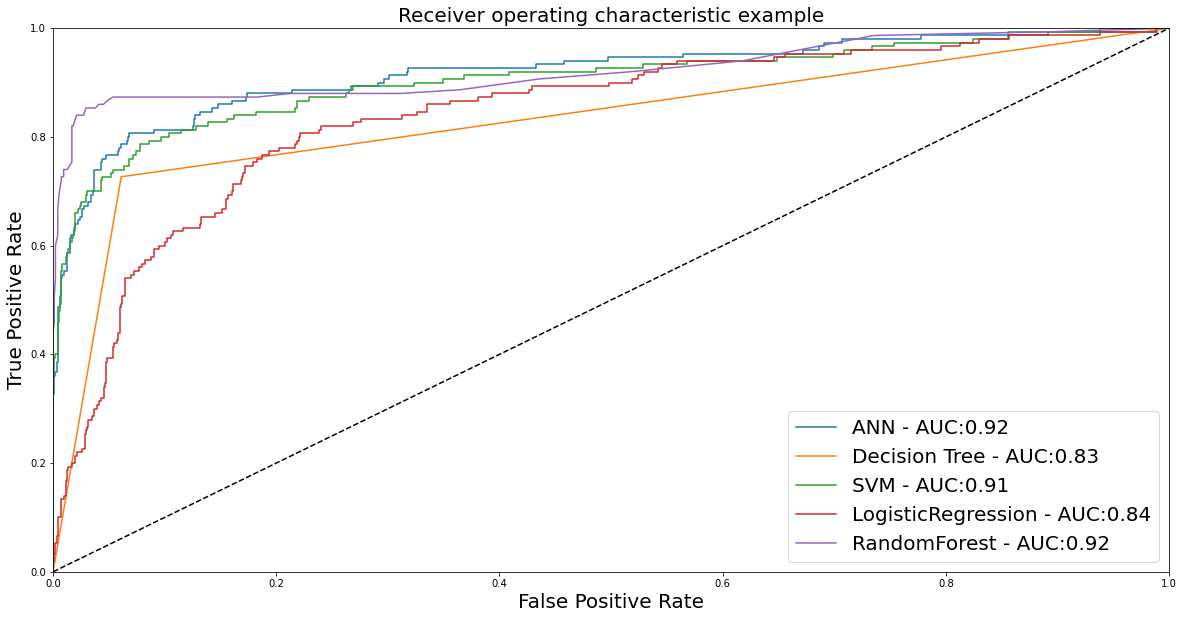

In [20]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])
for clf, title in zip([model,clf1,clf2,clf3, clf4], ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    if title != 'ANN':
        probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    else:
        y_pred = clf.predict(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()